In [152]:
from prody import *

from pylab import *

ion()

In [153]:
ances = parsePDB('7pw1')
selection = ances.select('resnum 1 to 296')
ances_ca = selection.select('name CA')

@> Connecting wwPDB FTP server RCSB PDB (USA).
@> 7pw1 downloaded (7pw1.pdb.gz)
@> PDB download via FTP completed (1 downloaded, 0 failed).
@> 2657 atoms and 1 coordinate set(s) were parsed in 0.17s.
@> Secondary structures were assigned to 207 residues.


In [154]:
gnm = GNM('7pw1')
gnm.buildKirchhoff(ances_ca)
gnm.calcModes(n_modes='all')

@> Kirchhoff was built in 0.04s.
@> 291 modes were calculated in 0.14s.


In [155]:
prs_mat, eff, sens = calcPerturbResponse(gnm)

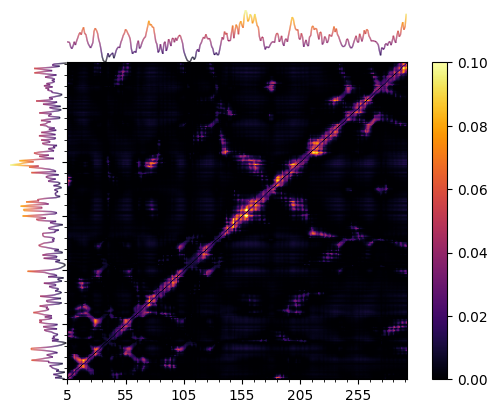

In [156]:

showPerturbResponse(prs_mat, ances_ca, 
                    cmap=cm.inferno, 
                    norm=Normalize(0,np.max(prs_mat)/10));


In [25]:
prs_mat, effectiveness, sensitivity = calcPerturbResponse(gnm)

In [26]:
# Example cutoff
sensitivity_cutoff = np.percentile(sensitivity, 100)

effective_residues = [residue for residue, value in zip(ances_ca.getResnames(), effectiveness) if value < effectiveness_cutoff]
sensitive_residues = [residue for residue, value in zip(ances_ca.getResnames(), sensitivity) if value < sensitivity_cutoff]

In [27]:


effectiveness_cutoff = np.percentile(effectiveness, 100)
sensitivity_cutoff = np.percentile(sensitivity, 100)


resnames_and_nums = list(zip(ances_ca.getResnames(), ances_ca.getResnums()))


effective_residues = [(resname, resnum) for (resname, resnum), value in zip(resnames_and_nums, effectiveness) if value < effectiveness_cutoff]
sensitive_residues = [(resname, resnum) for (resname, resnum), value in zip(resnames_and_nums, sensitivity) if value < sensitivity_cutoff]



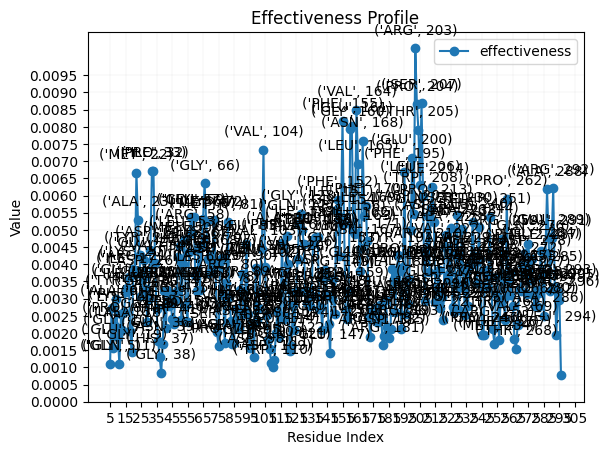

In [28]:
import matplotlib.pyplot as plt
    ...: import numpy as np
    ...: 
    ...: 
    ...: fig, ax = plt.subplots()
    ...: 
    ...: x_values = np.arange(5, 5 + len(effectiveness))
    ...: 
    ...: 
    ...: ax.plot(x_values, effectiveness, label='effectiveness', marker='o')
    ...: 
    ...: 
    ...: 
    ...: for i, value in enumerate(effective_residues):
    ...:     ax.annotate(value, (i+5, effectiveness[i]), textcoords="offset points", xytext=(0,10), ha='center')
    ...: 
    ...: grid(b=True, which='both', axis='both', linewidth=0.08)
    ...: x = np.linspace(0, 10, 20)
    ...: plt.xticks(np.arange(min(x)+5, max(x)+300, 10))
    ...: 
    ...: 
    ...: y = np.linspace(0, 0.01, 100)
    ...: 
    ...: plt.yticks(np.arange(min(y), max(y), 0.0005))
    ...: 
    ...: 
    ...: 
    ...: ax.legend()
    ...: ax.set_xlabel('Residue Index')
    ...: ax.set_ylabel('Value')
    ...: ax.set_title('Effectiveness Profile')
    ...: 
    ...: 
    ...: plt.show()

AttributeError: 'tuple' object has no attribute 'upper'

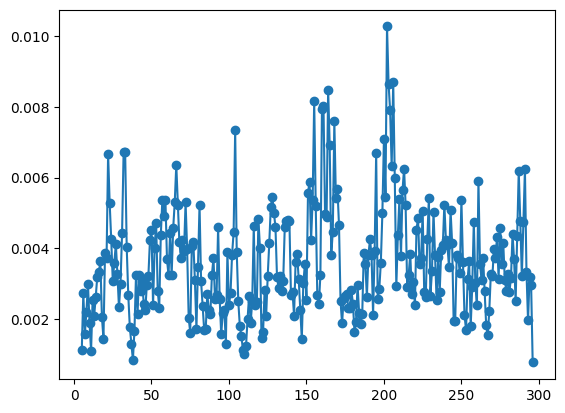

In [29]:
import matplotlib.pyplot as plt
import numpy as np


fig, ax = plt.subplots()

x_values = np.arange(5, 5 + len(effectiveness))


ax.plot(x_values, effectiveness, label='effectiveness', marker='o')


residue_mapping = {
    "ALA": "A",
    "CYS": "C",
    "ASP": "D",
    "GLU": "E",
    "PHE": "F",
    "GLY": "G",
    "HIS": "H",
    "ILE": "I",
    "LYS": "K",
    "LEU": "L",
    "MET": "M",
    "ASN": "N",
    "PRO": "P",
    "GLN": "Q",
    "ARG": "R",
    "SER": "S",
    "THR": "T",
    "VAL": "V",
    "TRP": "W",
    "TYR": "Y"
}


cutoff_value = 0.006 


for i, value in enumerate(effective_residues):
   
    if effectiveness[i] >= cutoff_value:
        
        one_letter_code = residue_mapping.get(value.upper(), "?")
        
        label_text = f"{one_letter_code} ({value}): {i+5}"
        ax.annotate(label_text, (i+5, effectiveness[i]), textcoords="offset points", xytext=(0,10), ha='center')

grid(b=True, which='both', axis='both', linewidth=0.08)
x = np.linspace(0, 10, 20)
plt.xticks(np.arange(min(x)+5, max(x)+300, 10))

y = np.linspace(0, 0.01, 100)
plt.yticks(np.arange(min(y), max(y), 0.0005))

# Add legend and labels
ax.legend()
ax.set_xlabel('Residue Index')
ax.set_ylabel('Value')
ax.set_title('Effectiveness Profile')

# Show the plot
plt.show()


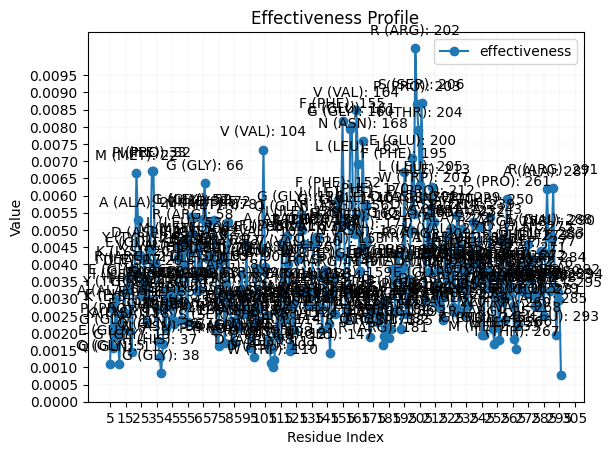

In [45]:
import matplotlib.pyplot as plt
import numpy as np


fig, ax = plt.subplots()

x_values = np.arange(5, 5 + len(effectiveness))


ax.plot(x_values, effectiveness, label='effectiveness', marker='o')


residue_mapping = {
    "ALA": "A",
    "CYS": "C",
    "ASP": "D",
    "GLU": "E",
    "PHE": "F",
    "GLY": "G",
    "HIS": "H",
    "ILE": "I",
    "LYS": "K",
    "LEU": "L",
    "MET": "M",
    "ASN": "N",
    "PRO": "P",
    "GLN": "Q",
    "ARG": "R",
    "SER": "S",
    "THR": "T",
    "VAL": "V",
    "TRP": "W",
    "TYR": "Y"
}


cutoff_value = 0.006  


for i, (residue_name, _) in enumerate(effective_residues): 
    
    one_letter_code = residue_mapping.get(residue_name.upper(), "?")
  
    label_text = f"{one_letter_code} ({residue_name}): {i+5}"
    ax.annotate(label_text, (i+5, effectiveness[i]), textcoords="offset points", xytext=(0,10), ha='center')
    if effectiveness[i] <= cutoff_value:
        
        pass  


grid(b=True, which='both', axis='both', linewidth=0.08)
x = np.linspace(0, 10, 20)
plt.xticks(np.arange(min(x)+5, max(x)+300, 10))

y = np.linspace(0, 0.01, 100)
plt.yticks(np.arange(min(y), max(y), 0.0005))


ax.legend()
ax.set_xlabel('Residue Index')
ax.set_ylabel('Value')
ax.set_title('Effectiveness Profile')


plt.show()



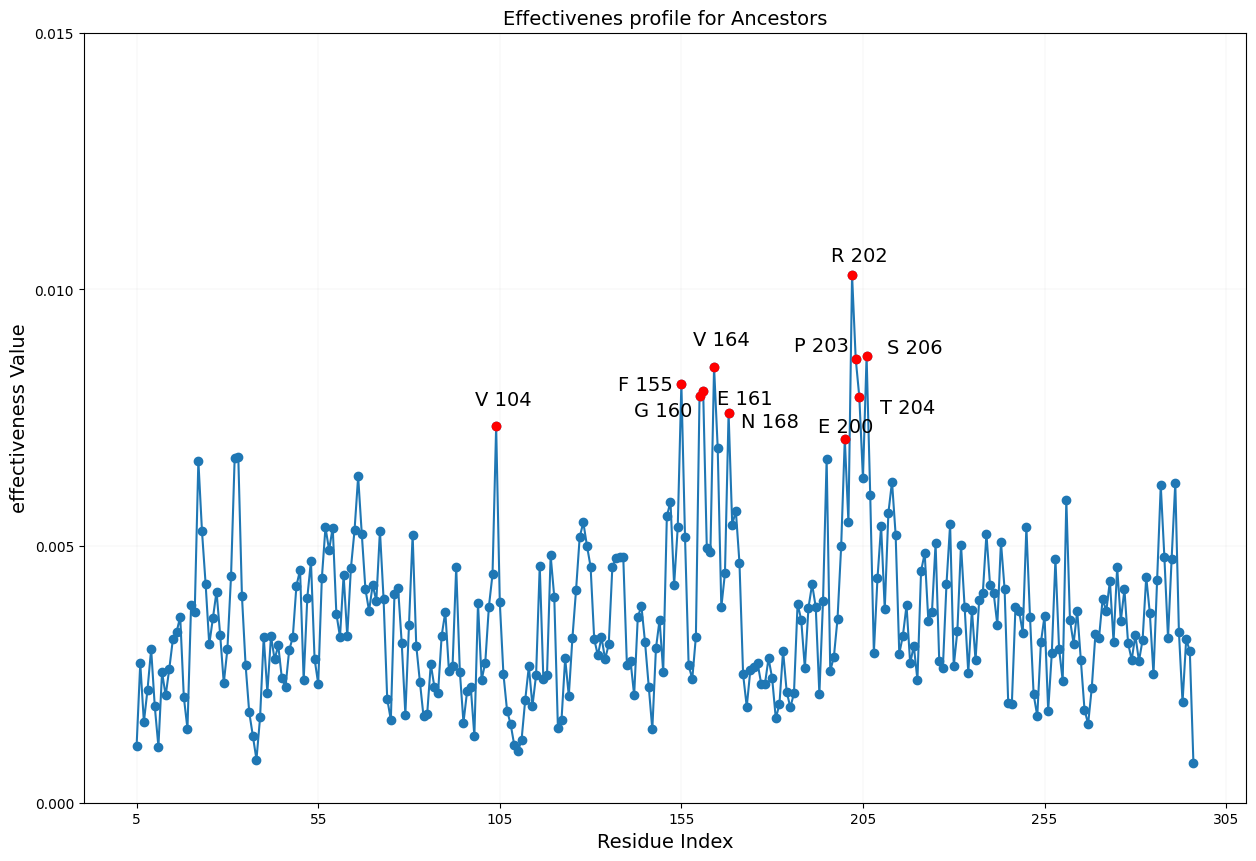

In [137]:
import matplotlib.pyplot as plt
import numpy as np


residue_mapping = {
    "ALA": "A",
    "CYS": "C",
    "ASP": "D",
    "GLU": "E",
    "PHE": "F",
    "GLY": "G",
    "HIS": "H",
    "ILE": "I",
    "LYS": "K",
    "LEU": "L",
    "MET": "M",
    "ASN": "N",
    "PRO": "P",
    "GLN": "Q",
    "ARG": "R",
    "SER": "S",
    "THR": "T",
    "VAL": "V",
    "TRP": "W",
    "TYR": "Y"
}

subset_color = 'red'

fig, ax = plt.subplots(figsize=(15, 10), dpi=100)

x_values = np.arange(5, 5 + len(effectiveness))

ax.plot(x_values, effectiveness, marker='o', linestyle='-')


custom_positions = {
    "F 155": (-26, -5),
    "E 161": (30, -10),
    "V 164": (5, 15),  
    "R 202": (5, 10),
    "P 203": (-25, 5),
    "S 206": (35, 2),
    "G 160": (-26, -15),
    "N 168": (30, -10),
    "T 204": (35, -12),
    "E 200": (1, 5),
  
}

for i, value_tuple in enumerate(effective_residues):
    if effectiveness[i] >= 0.007:
       
        value = value_tuple[0]
        
        one_letter_code = residue_mapping.get(value.upper(), "?")
      
        label = f"{one_letter_code} {i+5}"
        
       
        arrow_props = dict(arrowstyle="-", connectionstyle="arc3,rad=0.2")
        
      
        if label in custom_positions:
            custom_xytext = custom_positions[label]
        else:
            custom_xytext = (5, 15)  
        
     
        ax.annotate(label, (i+5, effectiveness[i]), textcoords="offset points", xytext=custom_xytext, ha='center', fontsize=14)
        ax.plot(i+5, effectiveness[i], marker='o', linestyle='', color=subset_color)

grid(b=True, which='both', axis='both', linewidth=0.08)
x = np.linspace(0, 10, 20)
plt.xticks(np.arange(min(x)+5, max(x)+300, 50))

y = np.linspace(0, 0.02, 10)
plt.yticks(np.arange(min(y), max(y), 0.005))

ax.set_xlabel('Residue Index', fontsize=14)
ax.set_ylabel('effectiveness Value', fontsize=14)
ax.set_title('Effectivenes profile for Ancestors', fontsize=14)

plt.show()


NameError: name 'sensitivity' is not defined

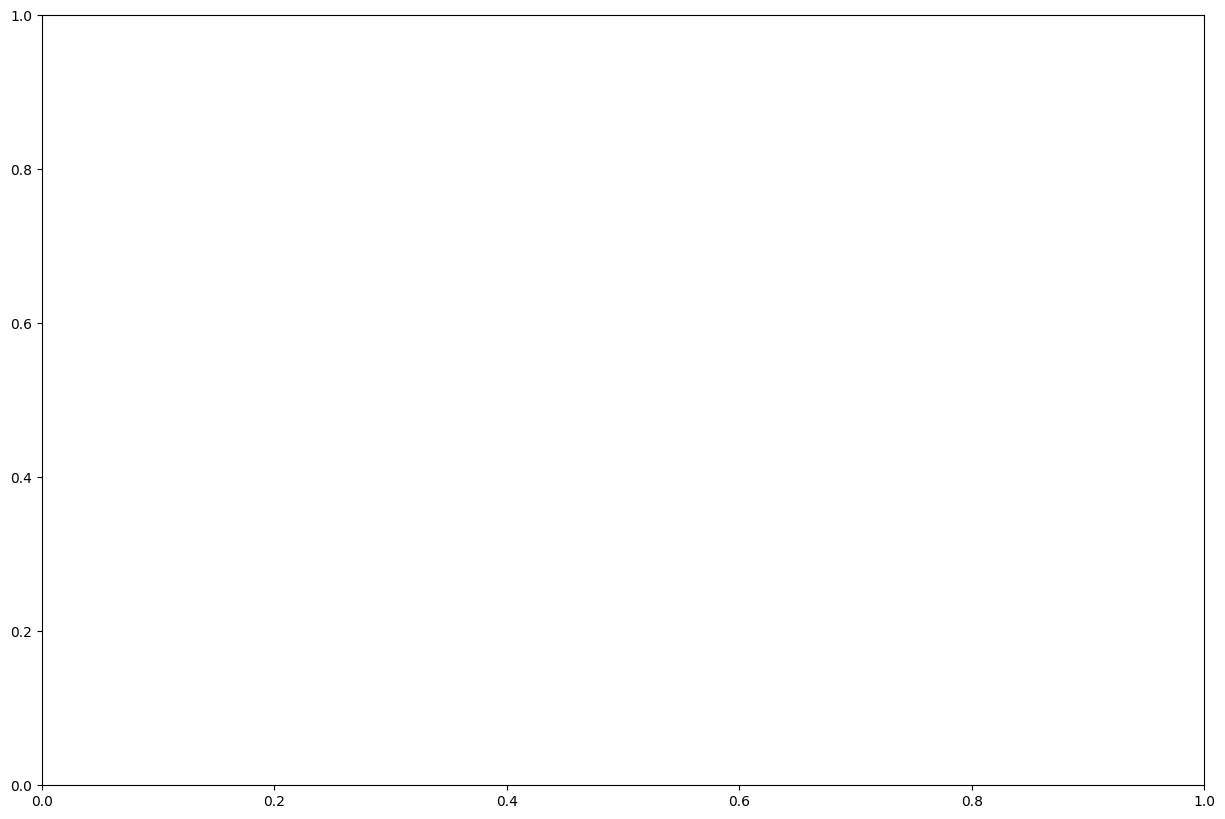

In [1]:
import matplotlib.pyplot as plt
import numpy as np


residue_mapping = {
    "ALA": "A",
    "CYS": "C",
    "ASP": "D",
    "GLU": "E",
    "PHE": "F",
    "GLY": "G",
    "HIS": "H",
    "ILE": "I",
    "LYS": "K",
    "LEU": "L",
    "MET": "M",
    "ASN": "N",
    "PRO": "P",
    "GLN": "Q",
    "ARG": "R",
    "SER": "S",
    "THR": "T",
    "VAL": "V",
    "TRP": "W",
    "TYR": "Y"
}



custom_positions = {
    "A 158": (-6, 5),
    "G 159": (30, 2),
    "N 167": (5, 15),  
    "M 162": (-55, 10),
    "S 157": (-25, -5),
    "V 163": (45, -12),
    "N 167": (46, -5),
    "E 165": (30, -15),
    "E 161": (-55, -5),
    "E 199": (25, -5),
    "N 166": (26, -5),
  
}


subset_color = 'red'

fig, ax = plt.subplots(figsize=(15, 10), dpi=100)

x_values = np.arange(5, 5 + len(sensitivity))



for i, value_tuple in enumerate(sensitive_residues):
    if sensitivity[i] >= 0.0060:
        
        value = value_tuple[0]
        
        one_letter_code = residue_mapping.get(value.upper(), "?")
       
        label = f"{one_letter_code} {i+5}"
        
       
        
        
        if label in custom_positions:
            custom_xytext = custom_positions[label]
        else:
            custom_xytext = (5, 10)  
        
  
        ax.annotate(label, (i+5, sensitivity[i]), textcoords="offset points", xytext=custom_xytext, ha='center', fontsize=14)
        ax.plot(i+5, sensitivity[i], marker='o', linestyle='', color=subset_color)

grid(b=True, which='both', axis='both', linewidth=0.08)
x = np.linspace(0, 10, 20)
plt.xticks(np.arange(min(x)+5, max(x)+300, 50))

y = np.linspace(0, 0.02, 10)
plt.yticks(np.arange(min(y), max(y), 0.005))

ax.set_xlabel('Residue Index', fontsize=14)
ax.set_ylabel('sensitivity Value', fontsize=14)
ax.set_title('Sensitivity profile for Ancestors', fontsize=14)

plt.show()


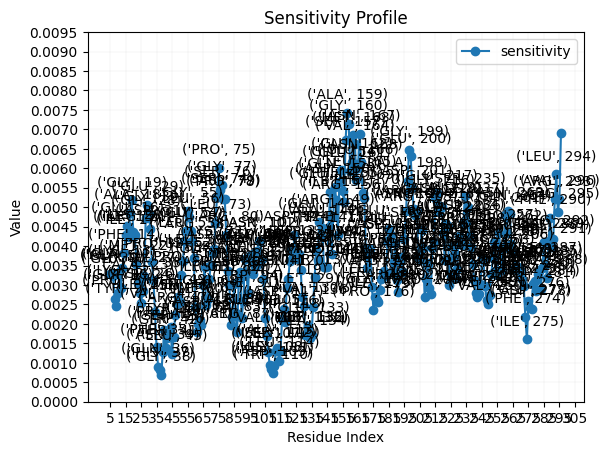

In [38]:
import matplotlib.pyplot as plt
    ...: import numpy as np
    ...: 
    ...:
    ...: fig, ax = plt.subplots()
    ...: 
    ...: x_values = np.arange(5, 5 + len(sensitivity))
    ...: 
    ...:
    ...: ax.plot(x_values, sensitivity, label='sensitivity', marker='o')
    ...: 
    ...: 
    ...: 
    ...: for i, value in enumerate(sensitive_residues):
    ...:     ax.annotate(value, (i+5, sensitivity[i]), textcoords="offset points", xytext=(0,10), ha='center')
    ...: 
    ...: grid(b=True, which='both', axis='both', linewidth=0.08)
    ...: x = np.linspace(0, 10, 20)
    ...: plt.xticks(np.arange(min(x)+5, max(x)+300, 10))
    ...: 
    ...: 
    ...: y = np.linspace(0, 0.01, 100)
    ...: 
    ...: plt.yticks(np.arange(min(y), max(y), 0.0005))
    ...: 
    ...: 
    ...:
    ...: ax.legend()
    ...: ax.set_xlabel('Residue Index')
    ...: ax.set_ylabel('Value')
    ...: ax.set_title('Sensitivity Profile')
    ...: 
    ...: 
    ...: plt.show()


In [37]:
print(prs_mat)

[[1.00000000e+00 2.90465953e-02 3.42616573e-02 ... 1.85703431e-04
  1.58373610e-04 2.54425648e-04]
 [6.18630041e-02 1.00000000e+00 5.41169463e-02 ... 7.24040351e-04
  6.53676913e-04 9.60368001e-04]
 [4.92114792e-02 3.64968652e-02 1.00000000e+00 ... 2.85036104e-04
  2.27295359e-04 3.92493097e-04]
 ...
 [3.43833127e-04 6.29440653e-04 3.67425768e-04 ... 1.00000000e+00
  5.78706388e-02 1.43364890e-01]
 [2.47991514e-04 4.80597357e-04 2.47791565e-04 ... 4.89423129e-02
  1.00000000e+00 1.38019779e-01]
 [7.47335853e-05 1.32451487e-04 8.02654968e-05 ... 2.27441622e-02
  2.58906081e-02 1.00000000e+00]]


In [22]:
print("Effectiveness:", effectiveness)
print("Sensitivity:", sensitivity)

Effectiveness: [0.00111031 0.00271945 0.00157155 0.00220301 0.00299302 0.001875
 0.00109352 0.00254197 0.00208944 0.00261131 0.00319244 0.00332187
 0.00362472 0.00205484 0.00144156 0.00385553 0.00371697 0.00666031
 0.00528728 0.00426008 0.00308404 0.00359124 0.00411434 0.00327493
 0.0023302  0.0029942  0.0044179  0.00672399 0.00672792 0.00402852
 0.00268862 0.00176672 0.00130021 0.00084098 0.00166529 0.00323464
 0.00214303 0.00324438 0.00279155 0.0030649  0.00241997 0.00225604
 0.00296786 0.00322213 0.00422569 0.0045306  0.00238262 0.00399543
 0.00471162 0.00280048 0.00231853 0.00437047 0.00536285 0.00492309
 0.00536111 0.00368511 0.00322862 0.00443783 0.00323987 0.00456573
 0.00530357 0.00635568 0.00523583 0.00416302 0.00373548 0.00424029
 0.00393317 0.00530007 0.00396977 0.00202416 0.00161207 0.00406689
 0.00417908 0.00310749 0.00171766 0.00346937 0.00522269 0.00306162
 0.00235663 0.00168163 0.0017194  0.00270166 0.00225133 0.00213802
 0.00325599 0.00371984 0.00256619 0.00266881 0.00

In [23]:
for (resname, resnum), value in zip(resnames_and_nums, effectiveness):
    print(f"Residue {resnum} ({resname}): Effectiveness = {value}")

for (resname, resnum), value in zip(resnames_and_nums, sensitivity):
    print(f"Residue {resnum} ({resname}): Sensitivity = {value}")

Residue 5 (GLY): Effectiveness = 0.0011103081223534483
Residue 6 (ALA): Effectiveness = 0.0027194452337027486
Residue 7 (GLU): Effectiveness = 0.001571545196317883
Residue 8 (PRO): Effectiveness = 0.002203006699140815
Residue 9 (TYR): Effectiveness = 0.0029930206836944768
Residue 10 (GLY): Effectiveness = 0.0018749967594880684
Residue 11 (GLN): Effectiveness = 0.001093521753347047
Residue 12 (LYS): Effectiveness = 0.0025419668824312354
Residue 13 (LYS): Effectiveness = 0.0020894358235923317
Residue 14 (PHE): Effectiveness = 0.0026113149586768597
Residue 15 (ILE): Effectiveness = 0.0031924408819773574
Residue 16 (GLU): Effectiveness = 0.0033218677813052176
Residue 17 (ILE): Effectiveness = 0.003624716359988
Residue 18 (ALA): Effectiveness = 0.0020548351859326227
Residue 19 (GLY): Effectiveness = 0.0014415560713619843
Residue 20 (LYS): Effectiveness = 0.0038555345081122063
Residue 21 (ARG): Effectiveness = 0.0037169686480030533
Residue 22 (MET): Effectiveness = 0.006660309029001164
Resid